In [95]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qreservoirpy import utilities

from qiskit import Aer
backend = Aer.get_backend('qasm_simulator')
from qiskit.circuit.library.standard_gates import HGate, SGate, CXGate, IGate

import tikzplotlib

import warnings
warnings.filterwarnings('ignore')


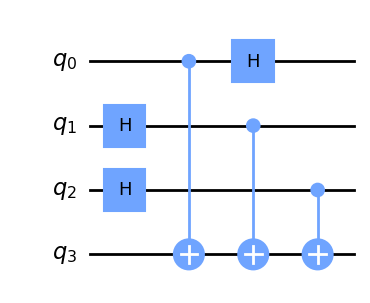

In [115]:
n_qubits = 4
SHOTS = 100000
timeseries = [0, 1, 0, 1, 1] * 5
encoder = {
    0: '000',
    1: '010',
    2: '100',
} 



circop = QuantumCircuit(n_qubits)
# circop.initialize('001', circop.qubits)
for i in range(1, n_qubits - 1):
    circop.h(i)
for i in range(n_qubits-1):
    circop.cx(i, n_qubits-1)

circop.h(0)
circop.draw('mpl')





In [111]:

# circop = utilities.random_circuit(3, gates=[
#     CXGate, HGate#,HGate, SGate #, TGate
# ], depth=4)





for i in range(3):
    circ = QuantumCircuit(3, 2)
    circ.initialize(encoder[i], circ.qubits)

    circ = circ.compose(circop)
    # circ.append(OP, circ.qubits)
    circ.measure([0, 1], [0, 1])
    job = backend.run(circ, shots=SHOTS).result()
    counts = job.get_counts()
    vec = np.zeros(4, dtype=np.int32)
    vec[0] = counts.get('00', 0)
    vec[1] = counts.get('01', 0)
    vec[2] = counts.get('10', 0)
    vec[3] = counts.get('11', 0)
    print(f'state {encoder[i]}: result= {vec}')


# circ.append(OP, circ.qubits)
# circ.draw('mpl')

state 000: result= [25012 24839 25120 25029]
state 010: result= [24963 24913 25088 25036]
state 100: result= [25109 24881 25019 24991]


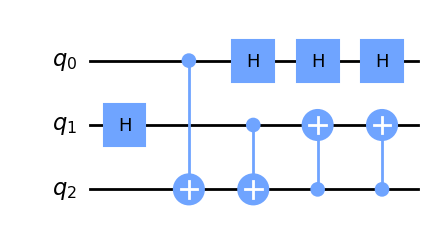

In [107]:
circop.draw('mpl')

In [99]:
for j in range(4):
    for i in range(4):
        circ = QuantumCircuit(3, 2)
        circ.initialize(encoder[i], range(2))

        circ = circ.compose(circop)
        circ.initialize(encoder[j], range(2))
        circ = circ.compose(circop)
        # circ.append(OP, circ.qubits)
        circ.measure([0, 1], [0, 1]) 
        job = backend.run(circ, shots=10000).result()
        vec = np.zeros(4, dtype=np.int32)

        counts = job.get_counts()
        vec[0] = counts.get('00', 0)
        vec[1] = counts.get('01', 0)
        vec[2] = counts.get('10', 0)
        vec[3] = counts.get('11', 0)
        print(f'state {encoder[i]} {encoder[j]}: result= {vec}')

QiskitError: 'StatePreparation parameter vector has 8 elements, therefore expects 3 qubits. However, 2 were provided.'